In [1]:
import pandas as pd

In [3]:
df= pd.read_excel('mic2.xlsx')
df.head()

,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Overal satisfaction,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend
0,31,Male,Research,">40, 000",5,5,5,4,4,5,...,4,4,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree
1,25,Male,student,"<10,000",3,5,3,4,5,5,...,4,4,Taste,No,Quantity issues,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral
2,45,Female,Teaching,">40, 000",3,4,4,4,3,4,...,4,4,Taste,No,NaN,Combo_VCS,Caramel,More than one flavoured,disagree,neutral
3,27,Male,Student,"<10,000",5,5,3,4,5,5,...,4,4,Taste,No,NaN,Combo_VCS,Strawbery,More than one flavoured,agree,agree
4,23,Female,Tutor,"10,000 - 20,000",5,5,4,4,5,5,...,5,5,Quality,No,NaN,Combo_VCS,Vanila,single flavoured,agree,Strongly agree


In [4]:
def custom_cls(x):
  if (0<= x<= 20):
    return '<=20'
  elif (21<= x<= 30):
    return '21 - 30'
  elif (31<= x<= 40):
    return '31 - 40'
  else:
    return '>=40'

In [5]:
df['AgeGp'] = df.apply(lambda tbl: custom_cls(tbl['Age']),
                       axis= 1)
df.head()

,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend,AgeGp
0,31,Male,Research,">40, 000",5,5,5,4,4,5,...,4,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree,31 - 40
1,25,Male,student,"<10,000",3,5,3,4,5,5,...,4,Taste,No,Quantity issues,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral,21 - 30
2,45,Female,Teaching,">40, 000",3,4,4,4,3,4,...,4,Taste,No,NaN,Combo_VCS,Caramel,More than one flavoured,disagree,neutral,>=40
3,27,Male,Student,"<10,000",5,5,3,4,5,5,...,4,Taste,No,NaN,Combo_VCS,Strawbery,More than one flavoured,agree,agree,21 - 30
4,23,Female,Tutor,"10,000 - 20,000",5,5,4,4,5,5,...,5,Quality,No,NaN,Combo_VCS,Vanila,single flavoured,agree,Strongly agree,21 - 30


In [8]:
age_gender = df.groupby(['AgeGp','Sex']).size()
age_gender = age_gender.to_frame()
type(age_gender)

pandas.core.frame.DataFrame

In [12]:
age_gender= age_gender.rename(columns = {0: 'Countzz'})
age_gender= age_gender.reset_index()
age_gender['%'] = (age_gender.iloc[:,-1]/(age_gender.iloc[:,-1]).sum())*100
age_gender

,index,AgeGp,Sex,Countzz,%
0,0,21 - 30,Female,11,22.0
1,1,21 - 30,Male,20,40.0
2,2,31 - 40,Female,4,8.0
3,3,31 - 40,Male,1,2.0
4,4,<=20,Female,5,10.0
5,5,<=20,Male,6,12.0
6,6,>=40,Female,2,4.0
7,7,>=40,Male,1,2.0


In [13]:
import seaborn as sns

In [16]:
plot_order = ['<=20','21 - 30','31 - 40','>=40']

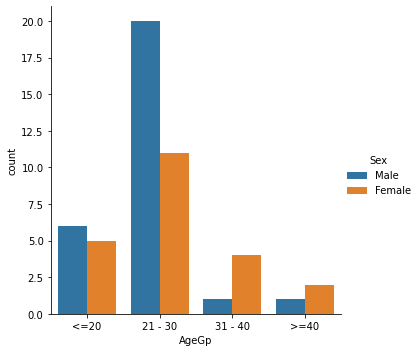

In [17]:
g = sns.catplot(x = 'AgeGp',
                kind= 'count',
                data= df,
                hue= 'Sex',
                order= plot_order)

In [18]:
import plotly.express as px

In [32]:
fig1 = px.sunburst(age_gender,
                  path = ['AgeGp', 'Sex','Countzz',],
                  color = 'AgeGp',
                  title= '')
fig1.show()

In [20]:
fig2 = px.sunburst(age_gender,
                  path = ['Sex', 'AgeGp','Countzz',],
                  color = 'AgeGp',
                  title= '')
fig2.show()

In [28]:
#pip install dash

In [23]:
import dash

In [24]:
from dash import html

In [25]:
from dash import dcc

In [27]:
#pip install jupyter_dash

In [29]:
from jupyter_dash import JupyterDash

In [33]:
miDash = JupyterDash(__name__)
miDash.layout = html.Div(children = [html.H1('Title'),
                                     html.P(html.P('Descripcion')),
                                     dcc.Graph(figure = fig1)
                                     ])
if __name__=='__main__':
  miDash.run_server()

Dash app running on:


<IPython.core.display.Javascript object>